In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

In [2]:
cntry_cntry_df = pd.read_csv("..//..//..//data//Data//DerivedData//Derived//funding_source_target.csv")
cntry_cntry_df = cntry_cntry_df.pivot_table(
    index='source',columns='target', values='value', fill_value=0)
cntry_cntry_df.head()

target,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
source,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.5,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.333333,...,2.299242,0.0,0.0,0.0,0.0,0.0,0.50,0.000000,0.0,0.0
Albania,0.0,8.833333,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.277778,...,1.000000,0.0,0.0,0.0,0.0,0.0,1.00,0.000000,0.0,0.0
Algeria,0.0,0.000000,1706.342726,0.0,0.000000,0.0,0.0,3.92619,0.0,1.997885,...,21.937491,0.0,0.0,0.0,0.0,0.0,0.25,0.333333,0.0,0.0
Andorra,0.0,0.000000,0.000000,3.5,0.000000,0.0,0.0,0.00000,0.0,0.000000,...,3.900000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0
Angola,0.0,0.000000,0.000000,0.0,20.581349,0.0,0.0,0.00000,0.0,2.650000,...,3.602381,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0


In [5]:
indexlist=cntry_cntry_df.index
collist = cntry_cntry_df.columns
cntrylist=list(set(indexlist)&set(collist))

In [6]:
cntry_normed = cntry_cntry_df.div(cntry_cntry_df.sum(axis=1), axis=0).fillna(0)
cntry_normed.head()

target,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
source,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.021739,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.014493,...,0.099967,0.0,0.0,0.0,0.0,0.0,0.021739,0.000000,0.0,0.0
Albania,0.000000,0.259804,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.008170,...,0.029412,0.0,0.0,0.0,0.0,0.0,0.029412,0.000000,0.0,0.0
Algeria,0.000000,0.000000,0.654523,0.000000,0.000000,0.0,0.0,0.001506,0.0,0.000766,...,0.008415,0.0,0.0,0.0,0.0,0.0,0.000096,0.000128,0.0,0.0
Andorra,0.000000,0.000000,0.000000,0.066038,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.073585,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
Angola,0.000000,0.000000,0.000000,0.000000,0.270807,0.0,0.0,0.000000,0.0,0.034868,...,0.047400,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


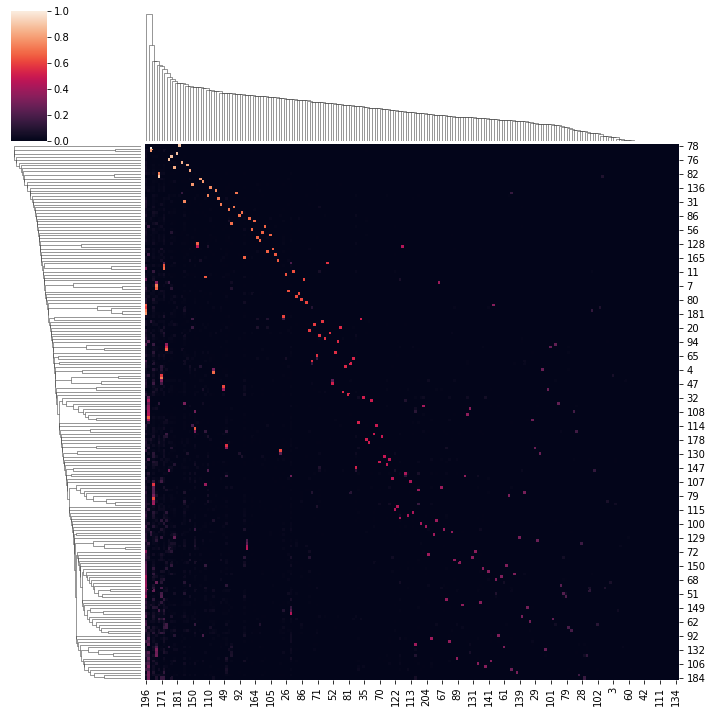

In [17]:
sns.clustermap(cntry_normed.values)

In [2]:
pubs_author_funder = pd.read_csv("..//..//..//data//Data//DerivedData//CleanedRawData//pubs_author_funder.csv")
pubs_author_funder['author_country'] = pubs_author_funder['author_country'].apply(literal_eval)
pubs_author_funder['funder_country'] = pubs_author_funder['funder_country'].apply(
    lambda x: literal_eval(x) if pd.notnull(x) else x)

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [20]:
pubs_author_funder.head()

,id,author_country,funder_country
0,30507292,[Turkey],[Turkey]
1,30574690,"[United States, France]","[United States, United States, United States, ..."
2,30574691,[Russia],[Russia]
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]"
4,30585097,"[Germany, Spain]",[Spain]


In [4]:
nonfund=pd.read_csv(
    "..//..//..//data//Data//RawData//non_fund_pub_author_country.csv",encoding="utf-16",error_bad_lines=False,sep="\t")
nonfund.columns=['id','year','discipline_code','contry','institution']
nonfund_dis=nonfund[['id','discipline_code']]
nonfund_dis = nonfund_dis.drop_duplicates()
nonfund_dis.head()

,id,discipline_code
0,30258902,88
1,30477250,88
2,30507293,77
3,30593089,89
4,30642884,88


In [5]:
funded_dis=pd.read_csv("..//..//..//data//Data//RawData//fundedarticle_dis.csv")
funded_dis.columns=['id','discipline_code']
funded_dis.head()

,id,discipline_code
0,50481659,96
1,53494799,13
2,55151311,96
3,54864617,77
4,32470248,98


In [6]:
pub_dis = pd.concat(
    [funded_dis,nonfund_dis],ignore_index=True)
pub_dis.head()

,id,discipline_code
0,50481659,96
1,53494799,13
2,55151311,96
3,54864617,77
4,32470248,98


In [7]:
pubs_author_funder = pubs_author_funder.merge(pub_dis,on="id", how="left")
pubs_author_funder

,id,author_country,funder_country,discipline_code
0,30507292,[Turkey],[Turkey],77
1,30574690,"[United States, France]","[United States, United States, United States, ...",83
2,30574691,[Russia],[Russia],83
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89
4,30585097,"[Germany, Spain]",[Spain],89
...,...,...,...,...
12759125,65301180,[Pakistan],NaN,89
12759126,65301286,"[Singapore, Singapore]",NaN,44
12759127,65301288,[Iran],NaN,96
12759128,65301295,[Israel],NaN,96


In [8]:
pubs_author_funder['num_author'] = pubs_author_funder['author_country'].apply(
    lambda x:len(set(x)))


In [9]:
pubs_author_funder = pubs_author_funder.fillna(0)
pubs_author_funder['num_funder'] = pubs_author_funder['funder_country'].apply(
    lambda x:len(set(x)) if x!=0 else 0)

In [10]:
pubs_author_funder['funding_unit']=pubs_author_funder['funder_country'].apply(
lambda x:len(x) if x!=0 else 0)

In [14]:
fundself_df = pubs_author_funder[pubs_author_funder.num_funder==1]
fundco_df = pubs_author_funder[pubs_author_funder.num_funder>1]

In [21]:
rca_self=prepare_rca_data(fundself_df)
rca_co=prepare_rca_data(fundco_df)
rca_all=prepare_rca_data(pubs_author_funder)

In [19]:
def prepare_rca_data(data):
    total=data['funding_unit'].sum()
    disunit_df=data.groupby(
    'discipline_code')['funding_unit'].sum().reset_index()
    funder_df=data[[
        'id','funder_country','discipline_code','num_funder']].explode('funder_country')
    funder_df = funder_df[funder_df.funder_country!=0]
    cntry_fund=funder_df.groupby(
        ['funder_country','discipline_code']).size().reset_index()
    cntry_fund.columns=['funder_country','discipline_code','unit_count']
    cntry_df = cntry_fund.groupby("funder_country")['unit_count'].sum().reset_index()
    cntry_dis_df = cntry_fund.pivot(index="funder_country",columns="discipline_code",values="unit_count")
    cntry_dis_df = cntry_dis_df.fillna(0)
    rca_df=cal_rca(cntry_df, disunit_df, total, cntry_dis_df)
    
    return rca_df



    

In [18]:
def cal_rca(country_dict, dis_dict, pub_total, df_data):
    """calculate rca value.
    """

    df_rca = pd.DataFrame().reindex_like(df_data).fillna(0.0)

    for indc, cou_row in country_dict.iterrows():
        # total number of publication published by the country
        country=cou_row['funder_country']
        country_total = cou_row["unit_count"]

        for indd, dis_row in dis_dict.iterrows():
            # total number of publication published in that discipline
            dis=dis_row['discipline_code']
            dis_total = dis_row["funding_unit"]

            # number of publication in that discipline of that country
            value = df_data.loc[country, dis]

            # try:
            # rca=(value/country_total)*(pub_total/dis_total)
            # except RuntimeWarning:
            # rca=0
            rca = (value / country_total) * (pub_total / dis_total)
            df_rca.at[country, dis] = rca

    return df_rca

In [28]:
rca_all.loc['China',:].values

array([1.12526999, 0.97579483, 0.70484544, 0.3020807 , 0.65889197,
       0.32252229, 0.66359315, 0.54871485, 0.37783211, 0.13543245,
       0.45319519, 0.6023015 , 1.46747406, 0.74871191, 0.6961459 ,
       0.20184416, 0.56063321, 0.76771654, 0.75085639, 0.598081  ,
       0.92458132, 0.36244422, 0.44806579, 0.22636828, 0.69113408,
       1.61555841, 1.69432276, 1.45366487, 1.37698952, 1.21334592,
       1.43155832, 1.49728932, 0.07152385, 0.12671344, 0.30758787,
       0.20480503, 0.83184333, 0.23347247, 0.51660872, 0.22767732,
       0.30180389, 0.56598219, 0.54421568, 0.59900903, 0.19729308,
       0.26304271, 0.38986422, 0.41734956, 0.72027421, 0.25634259,
       0.45711448, 0.36302538, 0.37497304, 0.32092284, 0.44879708,
       1.32120451, 0.09959809, 0.78635132, 1.16211137, 0.15106284,
       0.50617158, 0.26803114, 0.49245836, 0.22371542, 0.40751816,
       0.53558647, 0.30717025, 0.8651894 , 1.41357367, 0.97062258,
       0.89013939, 0.90272537, 1.73777568, 1.72800124, 1.50163

In [31]:
from scipy import spatial

In [38]:
def compare_sim(data1,data2):
    indexlist=list(set(data1.index)&set(data2.index))
    resultlist=[]
    for cntry in indexlist:
        cntry_1=data1.loc[cntry,:].values
        cntry_2=data2.loc[cntry,:].values
        sim = 1 - spatial.distance.cosine(cntry_1, cntry_2)
        resultlist.append([cntry,sim])
    return resultlist


In [65]:
self_co=compare_sim(pub_rca,rca_all)
self_co = pd.DataFrame(self_co, columns=['country','similarity'])
self_co

,country,similarity
0,Djibouti,0.149584
1,Samoa,0.180824
2,Nigeria,0.874585
3,Ivory Coast,0.928524
4,Solomon Islands,0.839961
...,...,...
185,Pakistan,0.925537
186,Maldives,0.615623
187,Republic of Kosovo,0.167265
188,Namibia,0.840679


In [67]:
self_co.sort_values(by="similarity", ascending=False).head(30)

,country,similarity
125,Bulgaria,0.988429
36,Armenia,0.983008
40,Mali,0.982618
48,Haiti,0.980837
157,China,0.979294
76,United States,0.976140
75,Tanzania,0.975152
16,Germany,0.974933
89,Cambodia,0.973122
32,Brazil,0.973054


In [50]:
pub_total=pubs_author_funder.shape[0]


In [52]:
pubs_author_funder.head()

,id,author_country,funder_country,discipline_code,num_author,num_funder,funding_unit
0,30507292,[Turkey],[Turkey],77,1,1,1
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2,1,4
2,30574691,[Russia],[Russia],83,1,1,1
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,1,1,6
4,30585097,"[Germany, Spain]",[Spain],89,2,1,1


In [54]:
dis_total=pubs_author_funder.groupby('discipline_code').size().reset_index()
dis_total.columns=['discipline_code','count']
dis_total.head()

,discipline_code,count
0,1,301926
1,2,244566
2,3,51899
3,4,101951
4,5,56852


In [56]:
pubs_author_funder['author_distinct'] = pubs_author_funder['author_country'].apply(
lambda x:list(set(x)))
pubs_author_funder.head()

,id,author_country,funder_country,discipline_code,num_author,num_funder,funding_unit,author_distinct
0,30507292,[Turkey],[Turkey],77,1,1,1,[Turkey]
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2,1,4,"[United States, France]"
2,30574691,[Russia],[Russia],83,1,1,1,[Russia]
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,1,1,6,[Spain]
4,30585097,"[Germany, Spain]",[Spain],89,2,1,1,"[Spain, Germany]"


In [57]:
cntry_dis_df = pubs_author_funder[
    ['id','discipline_code','author_distinct']].explode('author_distinct')
cntry_dis_df

,id,discipline_code,author_distinct
0,30507292,77,Turkey
1,30574690,83,United States
1,30574690,83,France
2,30574691,83,Russia
3,30585095,89,Spain
...,...,...,...
12759125,65301180,89,Pakistan
12759126,65301286,44,Singapore
12759127,65301288,96,Iran
12759128,65301295,96,Israel


In [59]:
cntry_df = cntry_dis_df.groupby("author_distinct").size().reset_index()
cntry_df.columns=['author_country','count']
cntry_df.head()

,author_country,count
0,Afghanistan,399
1,Albania,1424
2,Algeria,25049
3,Andorra,69
4,Angola,482


In [60]:
cntry_dis_df = cntry_dis_df.groupby(['author_distinct','discipline_code']).size().reset_index()
cntry_dis_df.head()

,author_distinct,discipline_code,0
0,Afghanistan,1,24
1,Afghanistan,2,12
2,Afghanistan,3,5
3,Afghanistan,4,7
4,Afghanistan,5,1


In [61]:
cntry_dis_df.columns=['country','discipline_code','count']
cntry_dis_df = cntry_dis_df.pivot(index="country",columns='discipline_code',
                                 values="count")
cntry_dis_df=cntry_dis_df.fillna(0)
cntry_dis_df.head()

discipline_code,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,24.0,12.0,5.0,7.0,1.0,0.0,3.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Albania,64.0,60.0,6.0,15.0,5.0,7.0,16.0,23.0,2.0,2.0,...,4.0,0.0,7.0,1.0,0.0,9.0,1.0,5.0,2.0,0.0
Algeria,748.0,437.0,79.0,167.0,131.0,59.0,122.0,115.0,13.0,41.0,...,221.0,64.0,896.0,280.0,333.0,1443.0,15.0,291.0,660.0,403.0
Andorra,0.0,4.0,0.0,2.0,3.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,12.0,24.0,1.0,9.0,6.0,0.0,12.0,18.0,3.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [62]:
def cal_rca(country_dict, dis_dict, pub_total, df_data):
    """calculate rca value.
    """

    df_rca = pd.DataFrame().reindex_like(df_data).fillna(0.0)

    for indc, cou_row in country_dict.iterrows():
        # total number of publication published by the country
        country=cou_row['author_country']
        country_total = cou_row["count"]

        for indd, dis_row in dis_dict.iterrows():
            # total number of publication published in that discipline
            dis=dis_row['discipline_code']
            dis_total = dis_row["count"]

            # number of publication in that discipline of that country
            value = df_data.loc[country, dis]

            # try:
            # rca=(value/country_total)*(pub_total/dis_total)
            # except RuntimeWarning:
            # rca=0
            rca = (value / country_total) * (pub_total / dis_total)
            df_rca.at[country, dis] = rca

    return df_rca

In [64]:
pub_rca=cal_rca(cntry_df,dis_total, pub_total,cntry_dis_df)
pub_rca

discipline_code,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2.541903,1.569038,3.080769,2.195608,0.562474,0.000000,1.207407,0.000000,0.896489,0.000000,...,0.462387,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.278622,0.000000,0.000000
Albania,1.899287,2.198195,1.035865,1.318290,0.788017,1.881406,1.804327,2.013773,0.502386,1.004435,...,0.518237,0.000000,0.218125,0.095933,0.000000,0.232755,0.805109,0.390345,0.092580,0.000000
Algeria,1.261920,0.910156,0.775352,0.834364,1.173698,0.901480,0.782122,0.572401,0.185640,1.170564,...,1.627723,1.072987,1.587215,1.527026,2.882719,2.121498,0.686540,1.291491,1.736801,1.965575
Andorra,0.000000,3.024377,0.000000,3.627526,9.757700,0.000000,2.327321,1.806939,5.184046,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Angola,1.052095,2.597701,0.510053,2.336819,2.793698,0.000000,3.997970,4.656055,2.226343,2.967460,...,0.000000,0.000000,0.092060,0.000000,0.000000,0.000000,0.000000,0.000000,0.136757,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,2.739950,1.421112,1.680559,1.568421,2.231487,6.025400,3.392995,2.169450,1.704212,3.333206,...,1.165618,0.173985,0.413627,1.202667,0.224593,1.144289,0.474977,1.531399,0.163853,0.658000
Vietnam,1.587497,1.983232,0.842314,0.755482,1.180858,0.640046,3.661422,2.359627,0.787852,1.137625,...,0.782609,0.582393,1.120319,1.376285,0.327252,1.257259,0.420862,2.444051,0.900687,1.181017
Yemen,1.236422,0.763205,0.128446,0.196159,2.579622,1.799679,0.587302,1.237668,1.868857,0.000000,...,0.192782,0.000000,1.043251,1.284723,0.793057,1.000525,0.000000,1.103572,1.963041,1.404287
